In [1]:
import pandas as pd
import matplotlib.pyplot as plt

reading1 = pd.read_csv('measure-breathing-pressure-2020-07-17.csv', skiprows=1, parse_dates=['Time'])
reading1['Time'] = pd.to_datetime(reading1['Time'])
# reading1.index = (reading1['Time'] - reading1['Time'][0]).astype('timedelta64[ms]')
reading1.index = reading1['Time'].astype('datetime64[ms]')

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<Figure size 432x288 with 0 Axes>

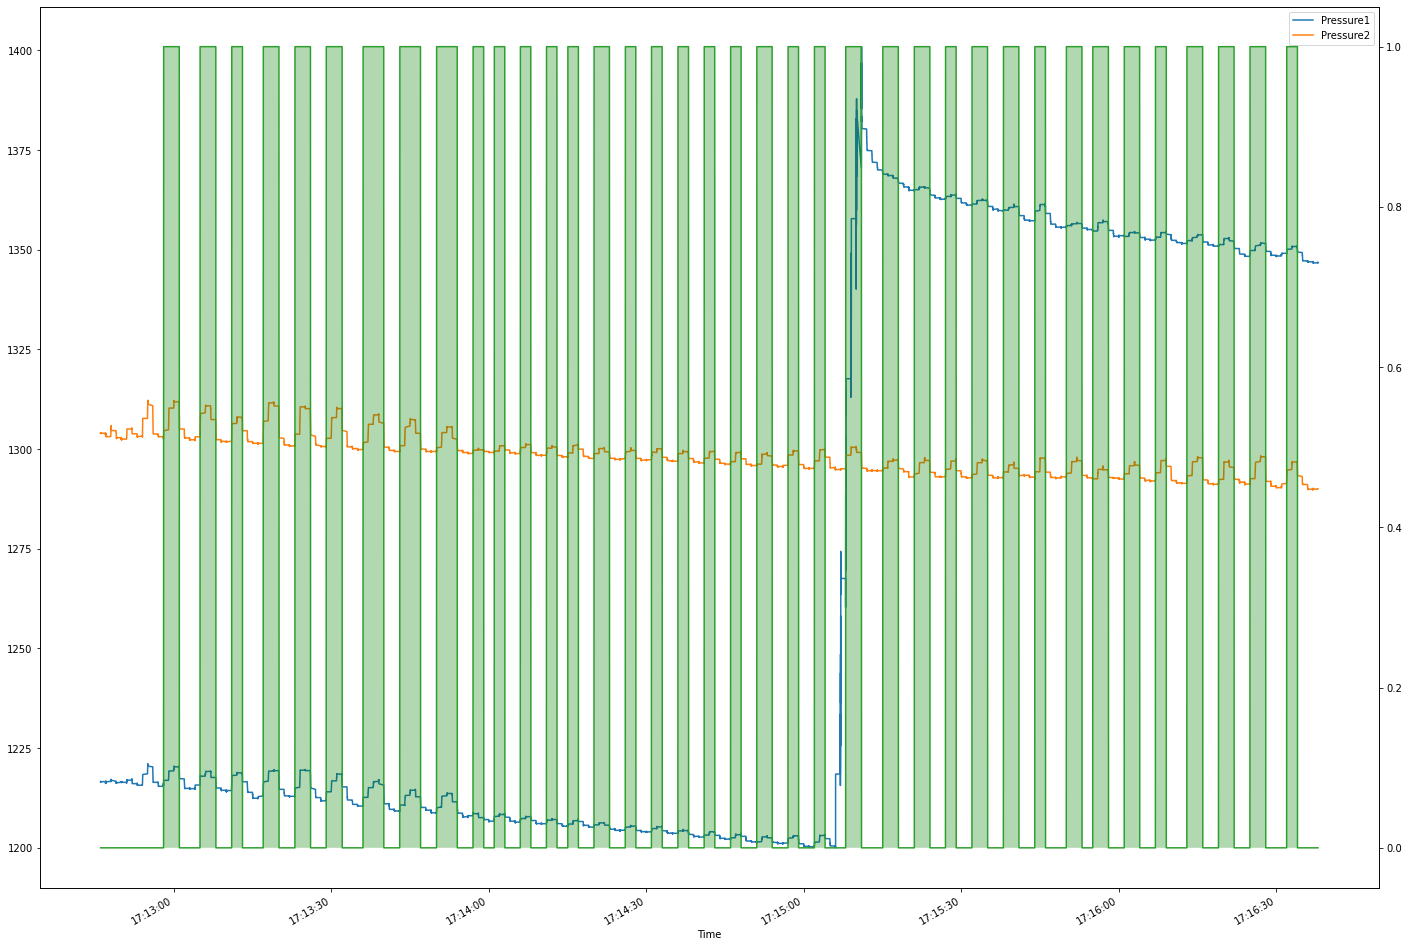

In [44]:
plt.figure()
ax = reading1[['Pressure1', 'Pressure2']].plot(kind='line', figsize=(24, 18), scaley=(1200,1400))
ax2 = reading1['Button'].plot.line(secondary_y=['Button'], stacked=False)
ax2.fill_between(reading1.index, 0, reading1['Button'], facecolor='green', alpha=0.3)

/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/yoavluft/Projects/Soma-tech/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


(737623.7180655631, 737623.719065563)

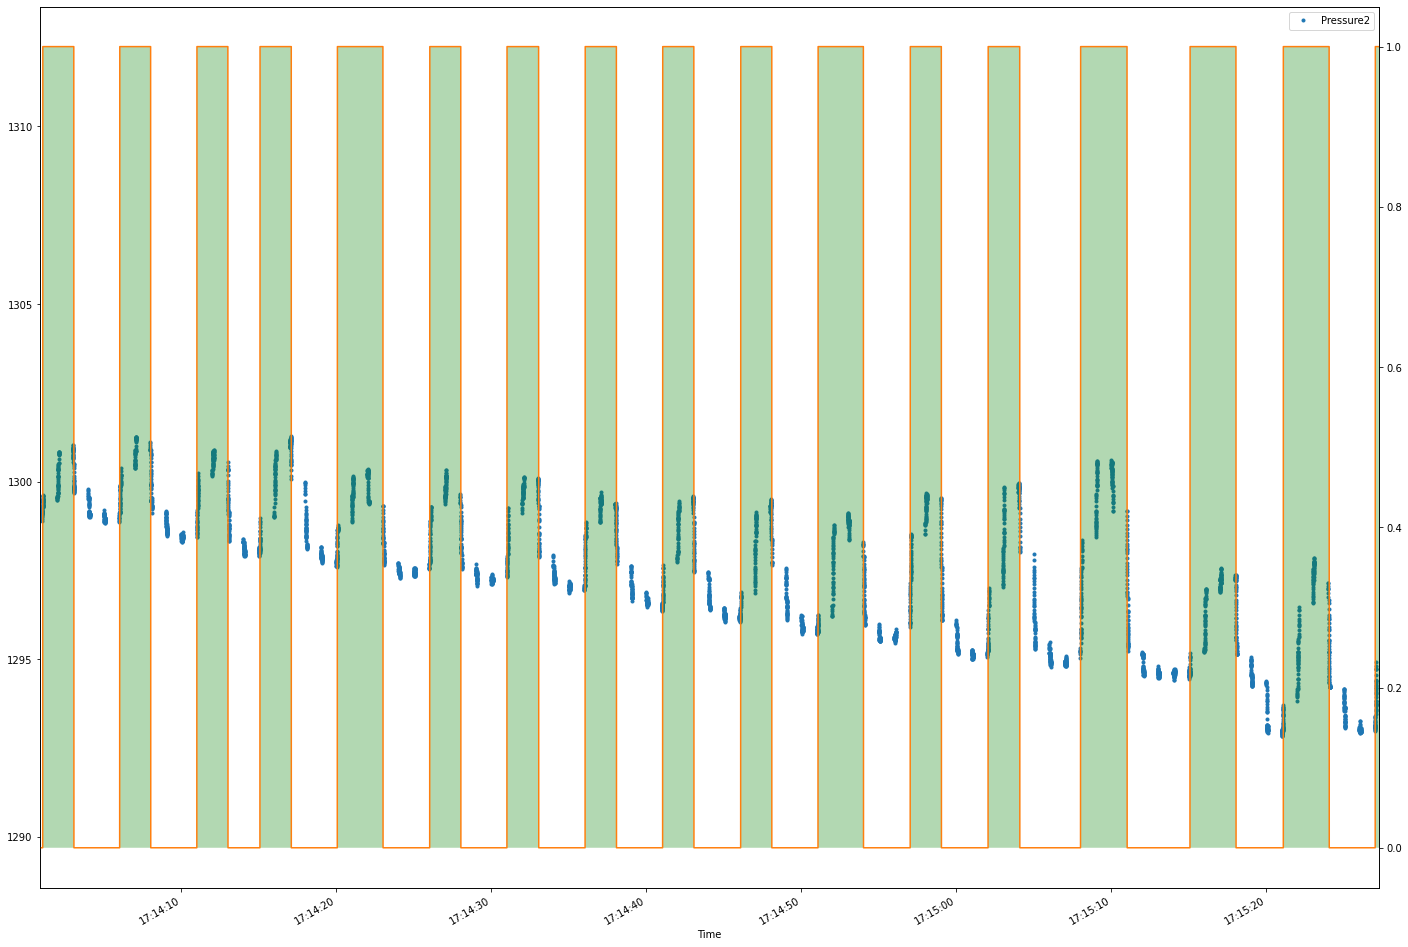

In [58]:
ax3 = reading1[['Pressure2']].rolling(2, win_type='triang').sum().plot(figsize=(24,18), style='.')
ax4 = reading1['Button'].plot.line(secondary_y=['Button'], stacked=False)
ax4.fill_between(reading1.index, 0, reading1['Button'], facecolor='green', alpha=0.3)
ax3.get_xlim()
start_time = 737623.7170655631
plt.xlim(start_time + 0.001, start_time+ 0.002)

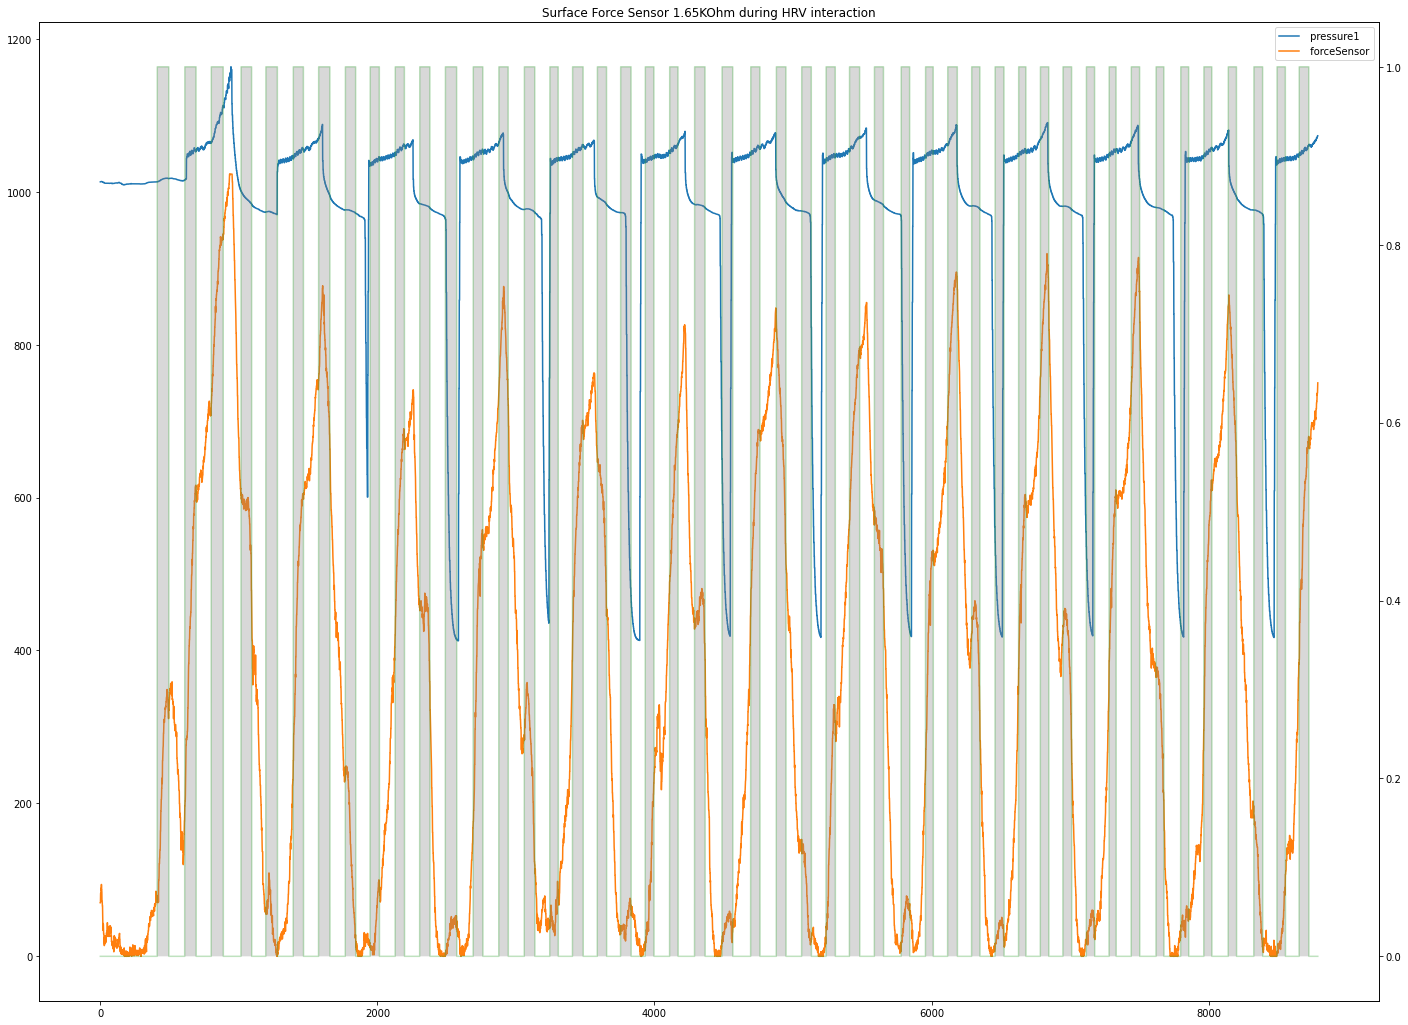

In [48]:
def create_graph(file_name, index_name, columns, secondary_column, title = None):
    if title is None:
        title = file_name
    hrvReadings = pd.read_csv(file_name)
    hrvReadings['time'] = pd.to_datetime(hrvReadings[index_name])
    hrvReadings['since'] = hrvReadings['time'] - hrvReadings['time'].loc[0]
    hrvReadings.set_index('since')

    hrvAx1 = hrvReadings[columns].plot(kind='line', figsize=(24, 18), title=title)
    hrvAx2 = hrvReadings[secondary_column].plot.line(x='since', secondary_y=[secondary_column], stacked=False, alpha=0.3)
    hrvAx2.fill_between(hrvReadings.index, 0, hrvReadings[secondary_column], facecolor='grey', alpha=0.3)
    
create_graph(file_name='force-sensor-experiments/hrvBreathing-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title="Surface Force Sensor 1.65KOhm during HRV interaction"
             )

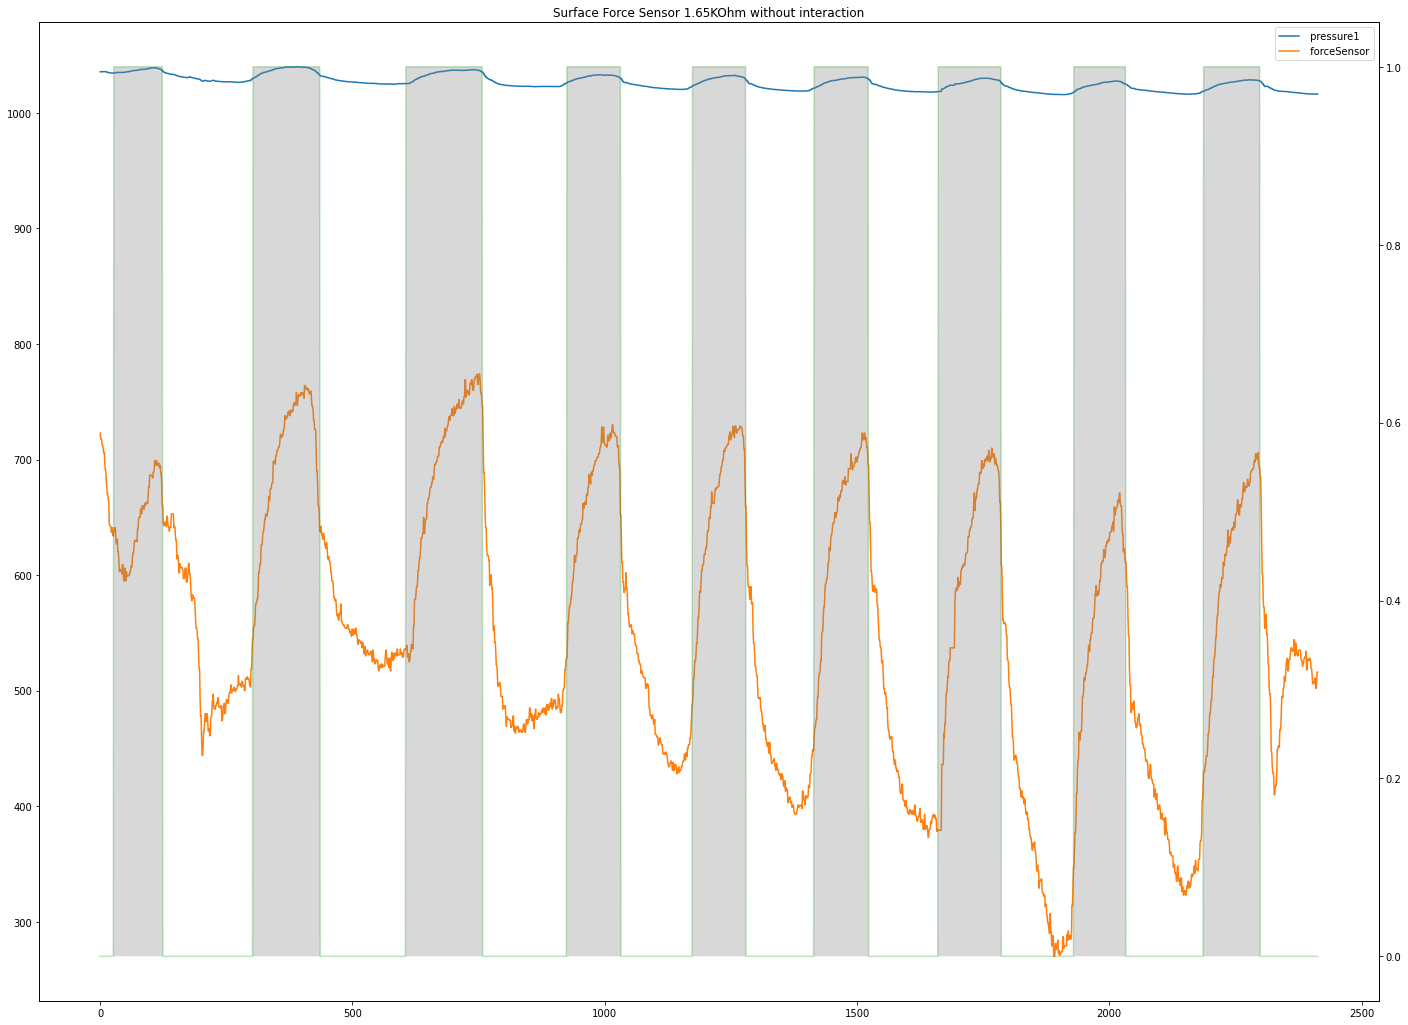

In [35]:
create_graph(file_name='force-sensor-experiments/pressure-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title='Surface Force Sensor 1.65KOhm without interaction'
             )

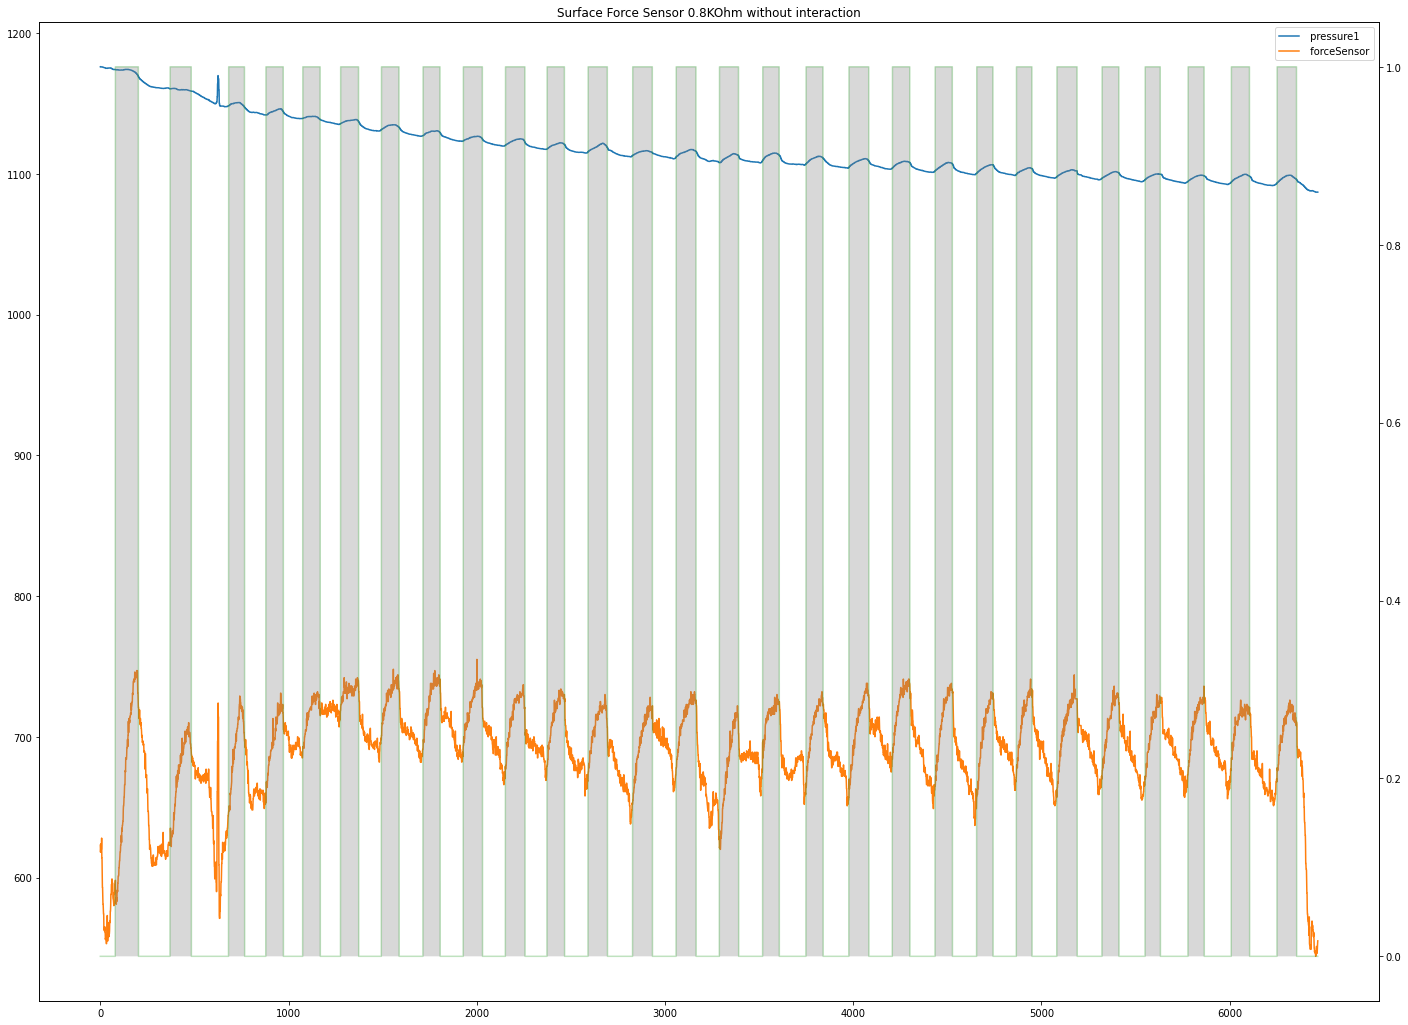

In [36]:
create_graph(file_name='force-sensor-experiments/pressure-0_8KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title='Surface Force Sensor 0.8KOhm without interaction'
             )

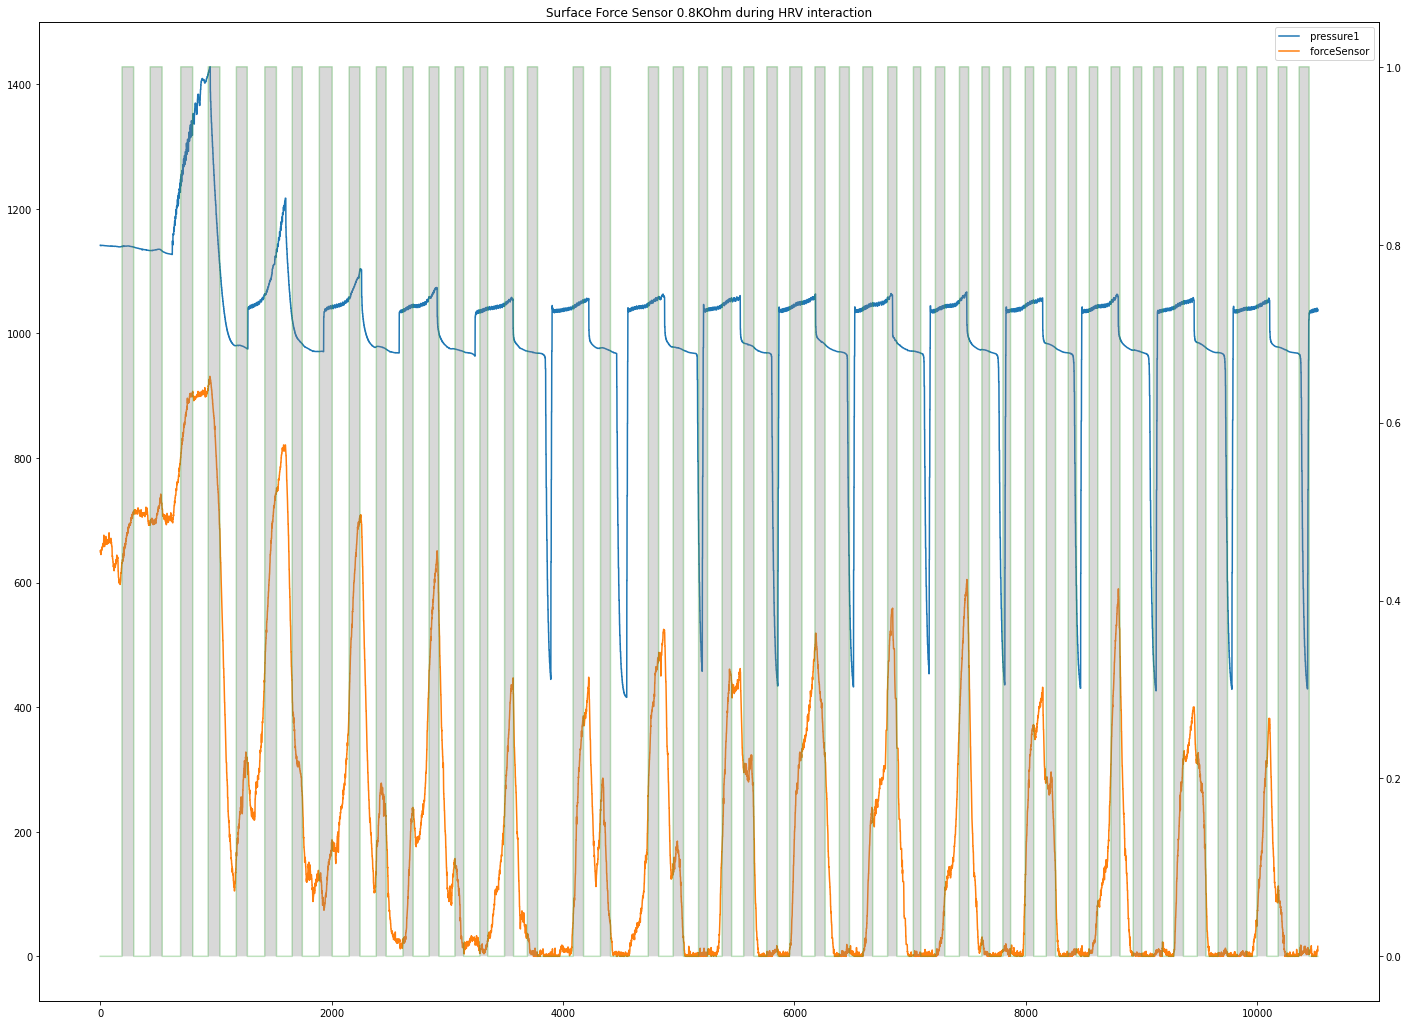

In [37]:
create_graph(file_name='force-sensor-experiments/hrvBreathing-0_8KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title='Surface Force Sensor 0.8KOhm during HRV interaction'
             )

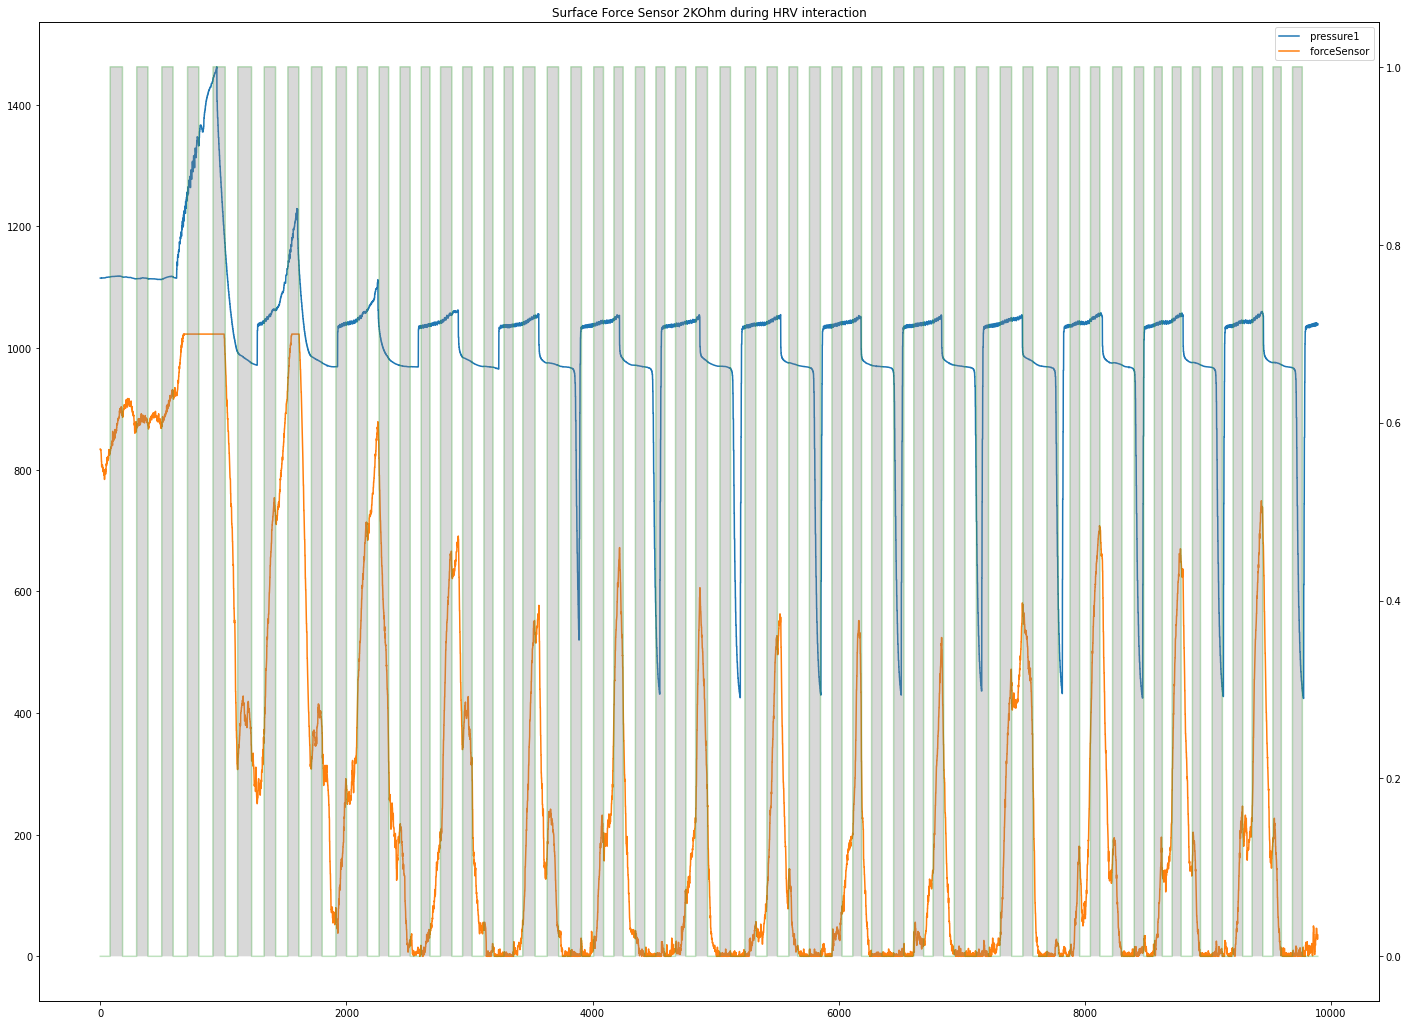

In [38]:
create_graph(file_name='force-sensor-experiments/hrvBreathing-2KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title='Surface Force Sensor 2KOhm during HRV interaction'
             )

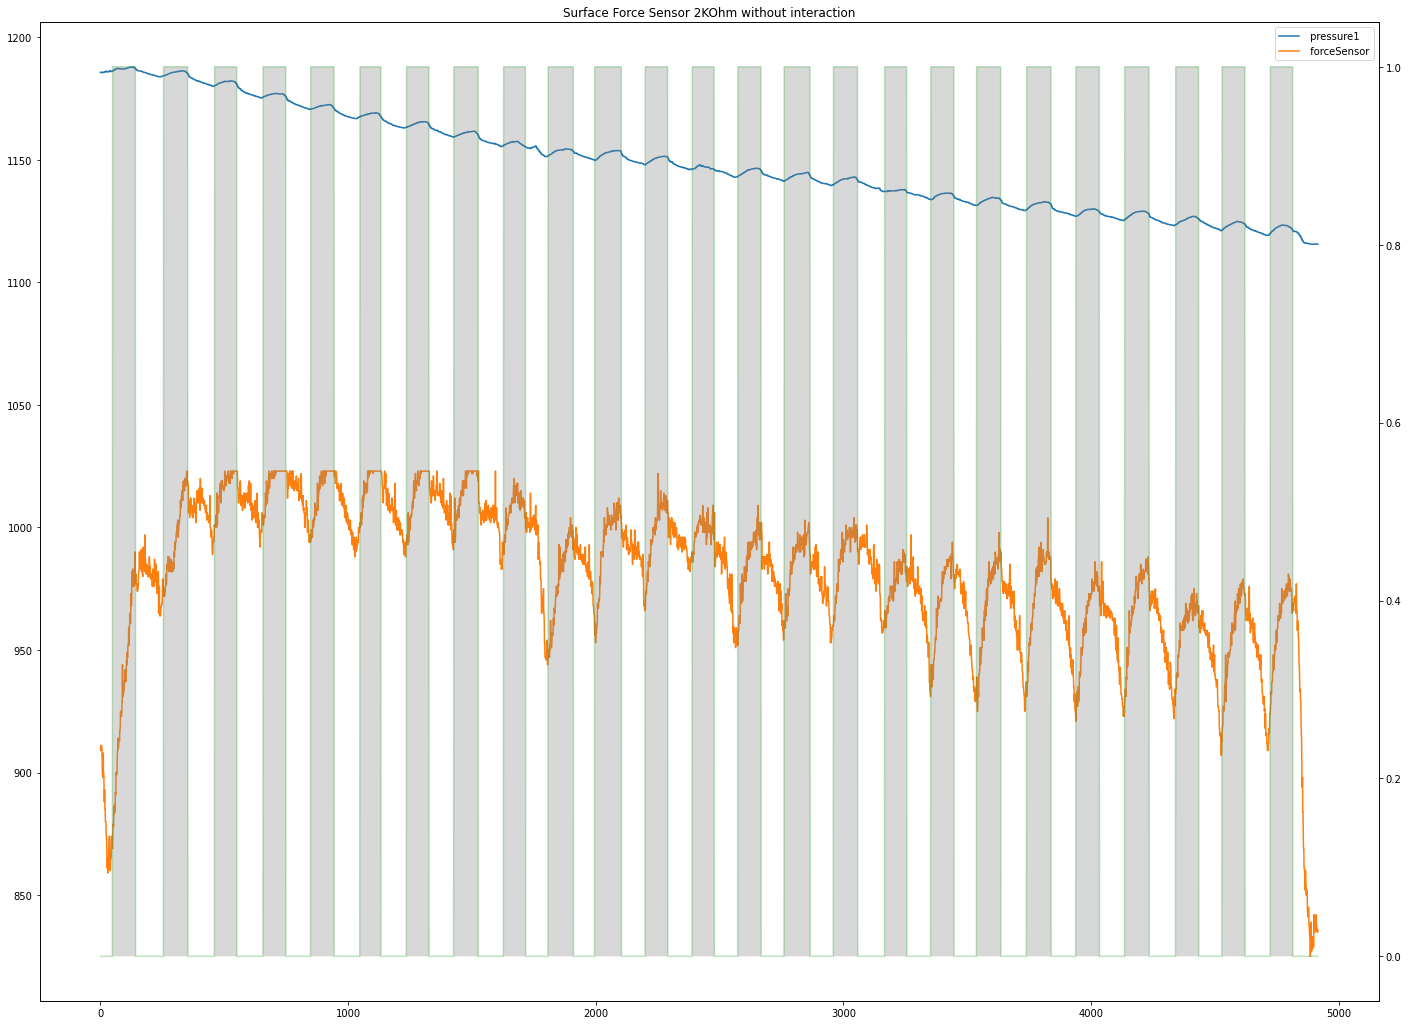

In [39]:
create_graph(file_name='force-sensor-experiments/pressure-2KOhm.csv',
             index_name='time',
             columns=[' pressure1', ' forceSensor'],
             secondary_column=' button',
             title='Surface Force Sensor 2KOhm without interaction'
             )

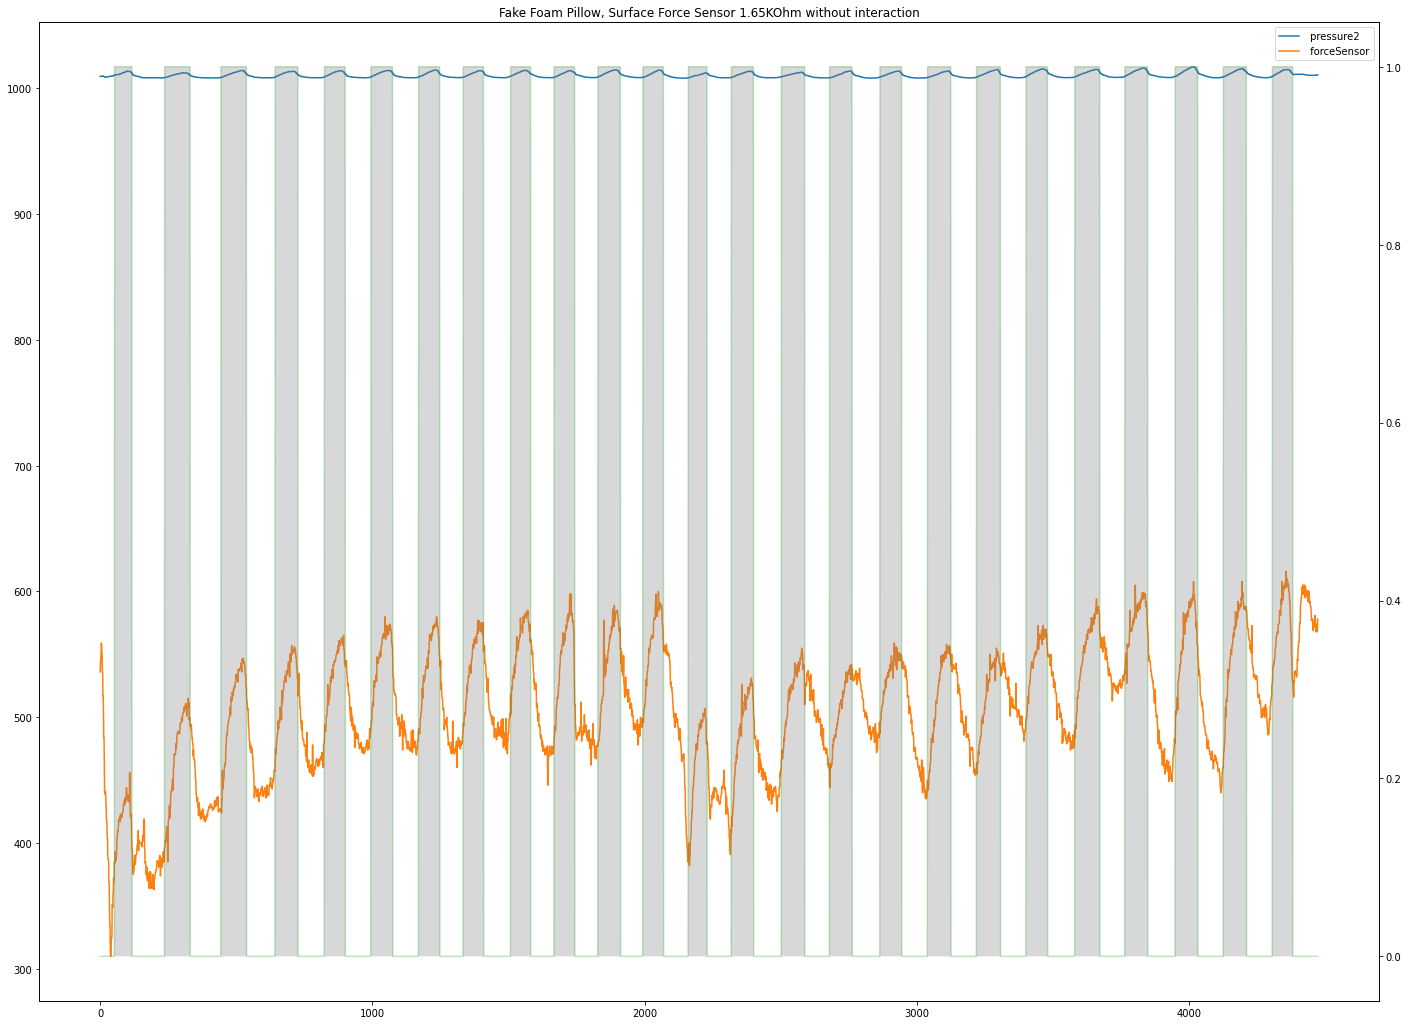

In [40]:
create_graph(file_name='force-sensor-experiments/pressure-fake-foam-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Foam Pillow, Surface Force Sensor 1.65KOhm without interaction'
             )

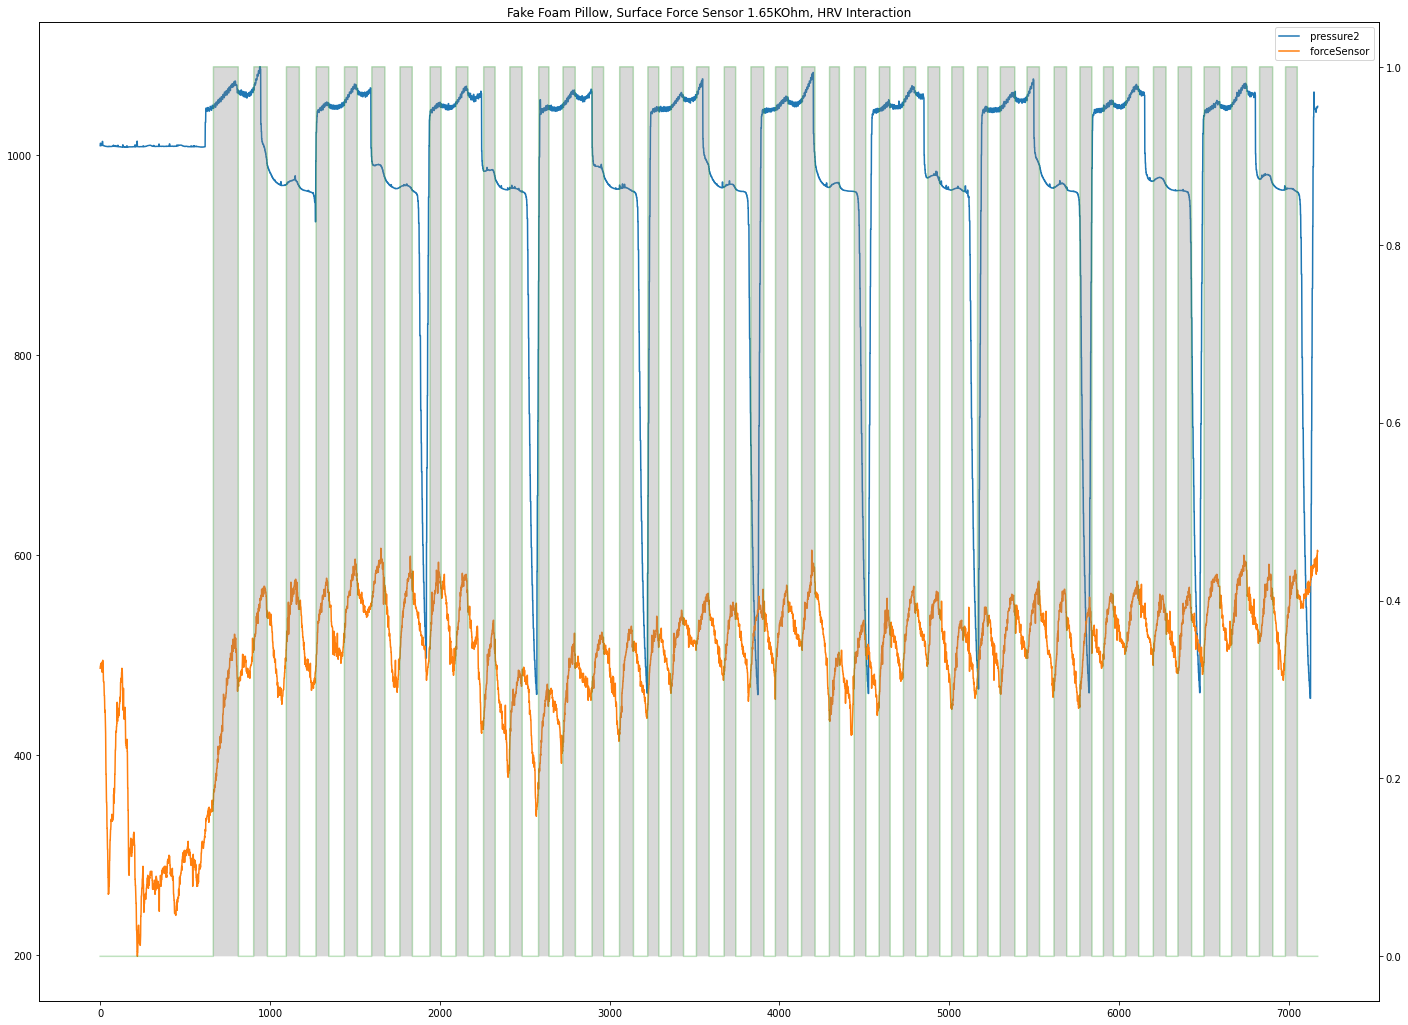

In [41]:
create_graph(file_name='force-sensor-experiments/hrvBreathing-fake-foam-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Foam Pillow, Surface Force Sensor 1.65KOhm, HRV Interaction'
             )

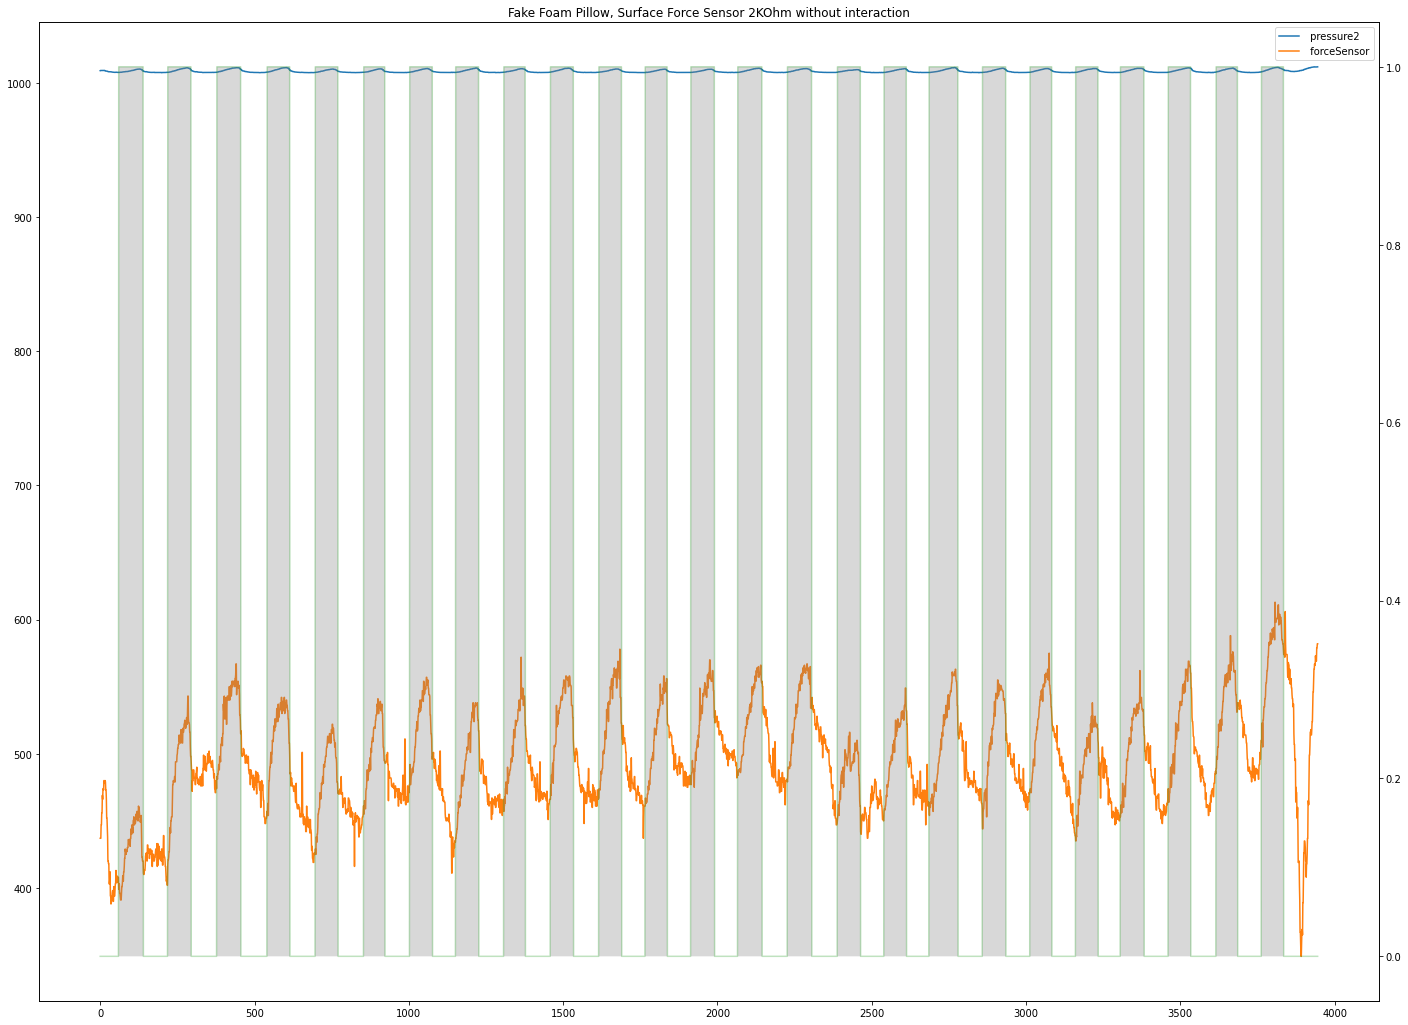

In [42]:
create_graph(file_name='force-sensor-experiments/pressure-fake-foam-2kOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Foam Pillow, Surface Force Sensor 2KOhm without interaction'
             )

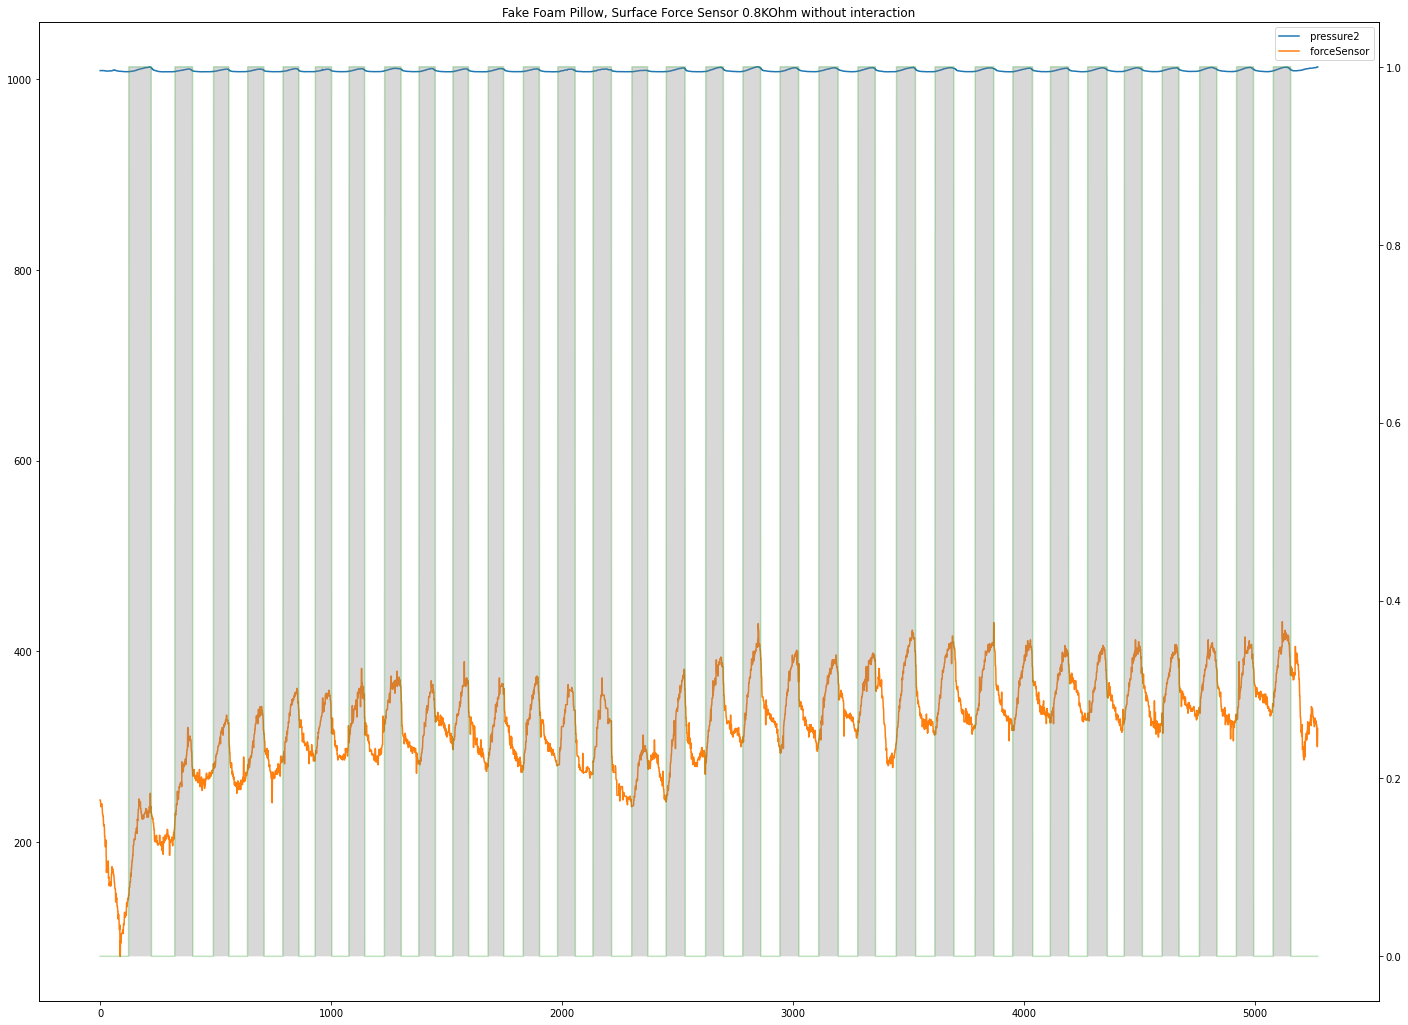

In [43]:
create_graph(file_name='force-sensor-experiments/pressure-fake-foam-0_8KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Foam Pillow, Surface Force Sensor 0.8KOhm without interaction'
             )

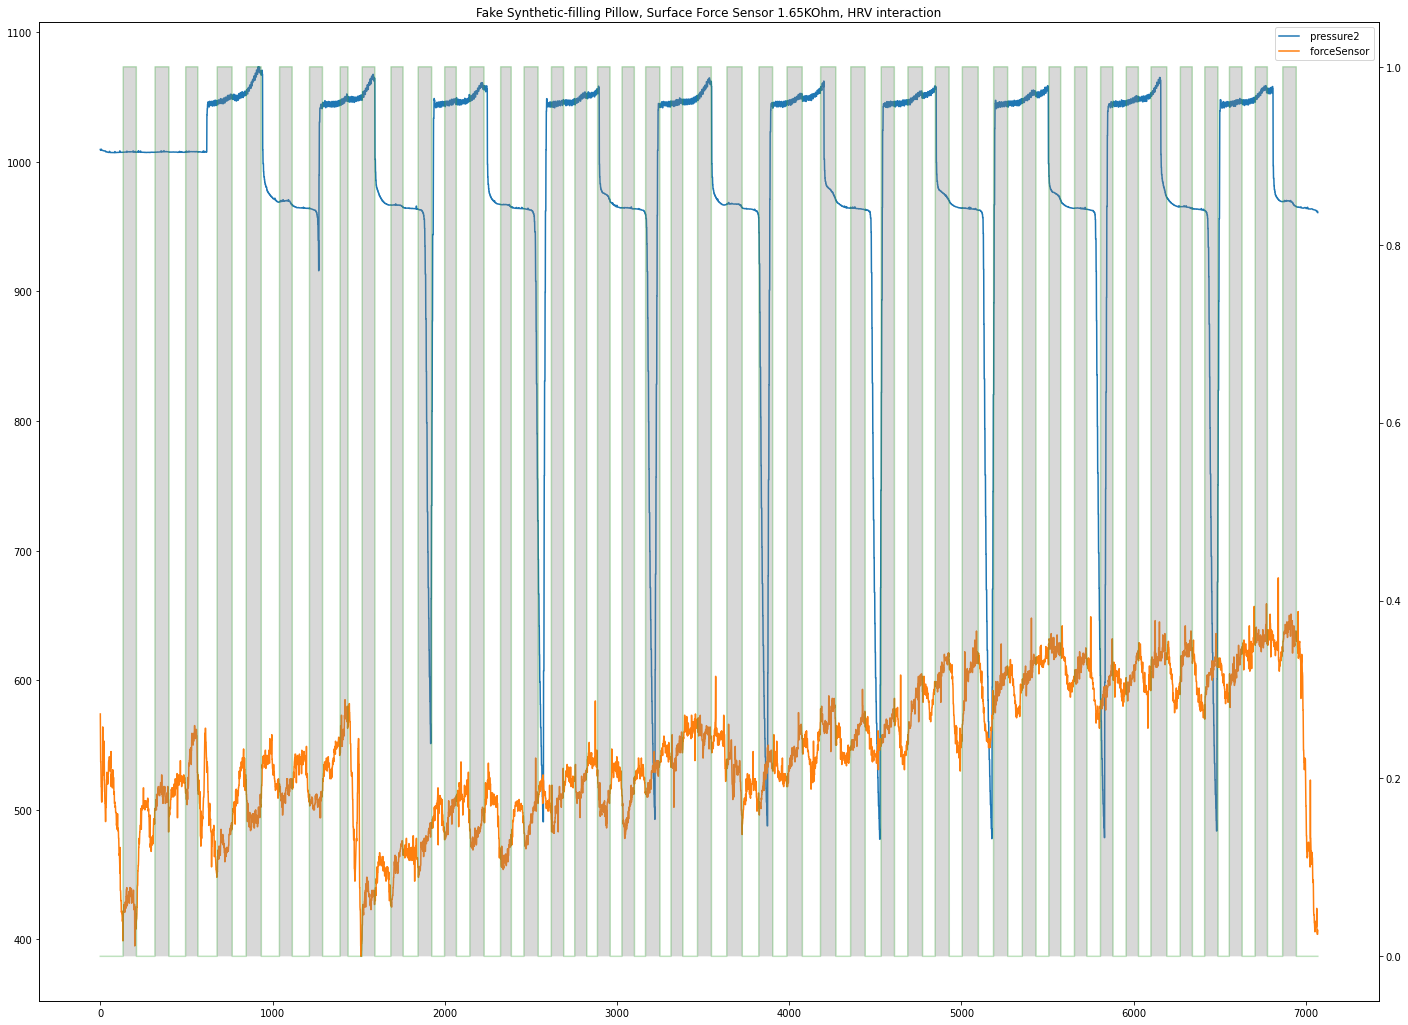

In [44]:
create_graph(file_name='force-sensor-experiments/hrvBreathing-fake-synth-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Synthetic-filling Pillow, Surface Force Sensor 1.65KOhm, HRV interaction'
             )

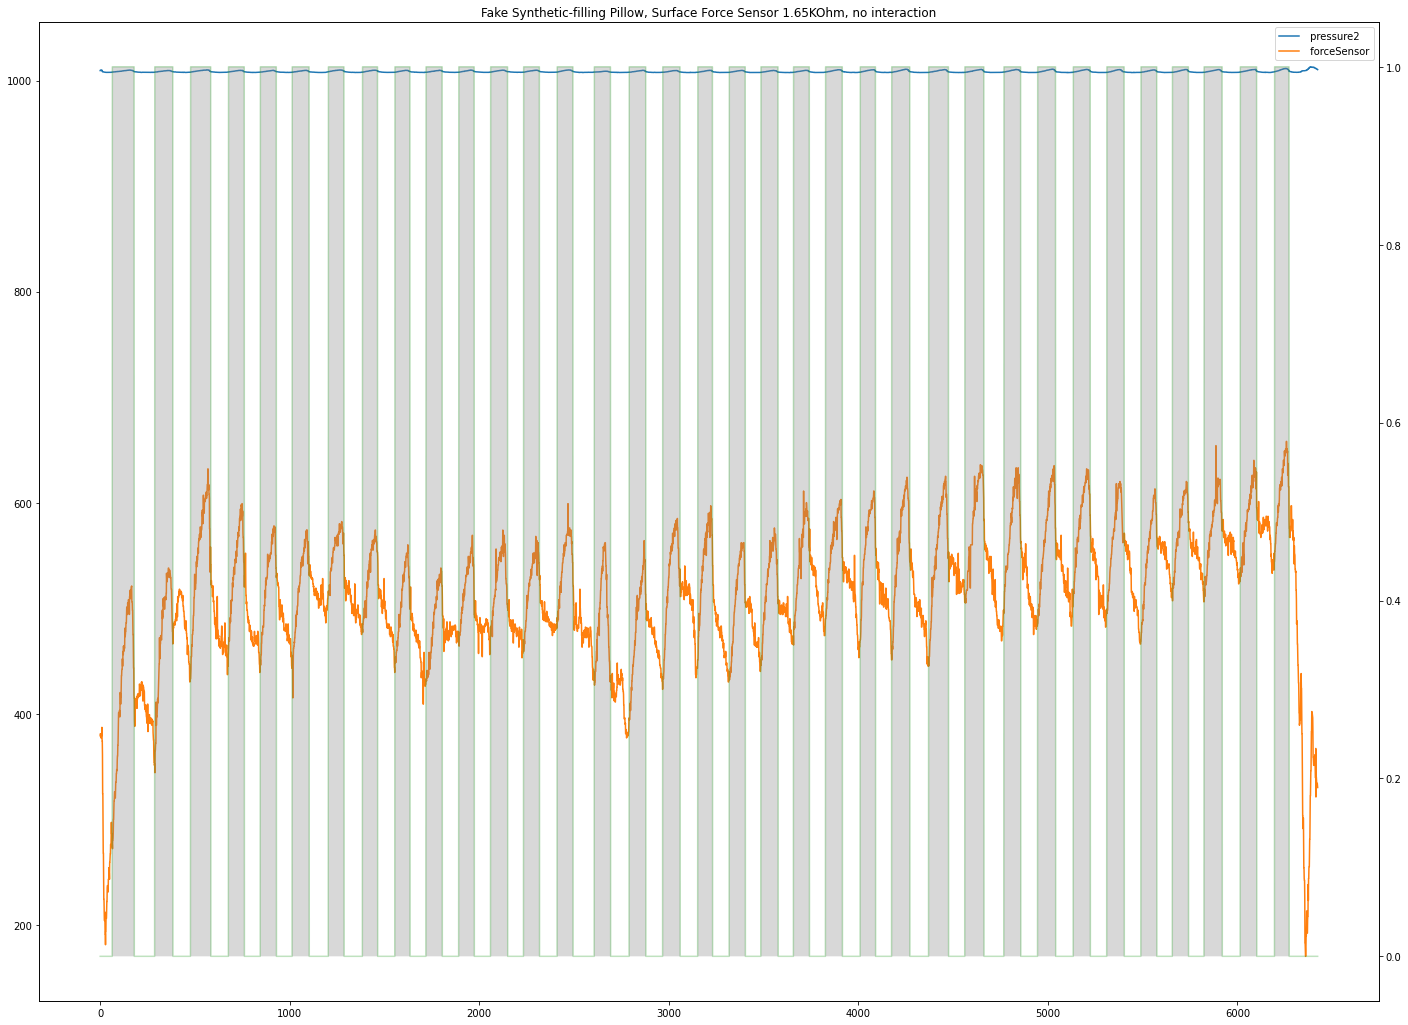

In [45]:
create_graph(file_name='force-sensor-experiments/pressure-fake-synth-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Synthetic-filling Pillow, Surface Force Sensor 1.65KOhm, no interaction'
             )

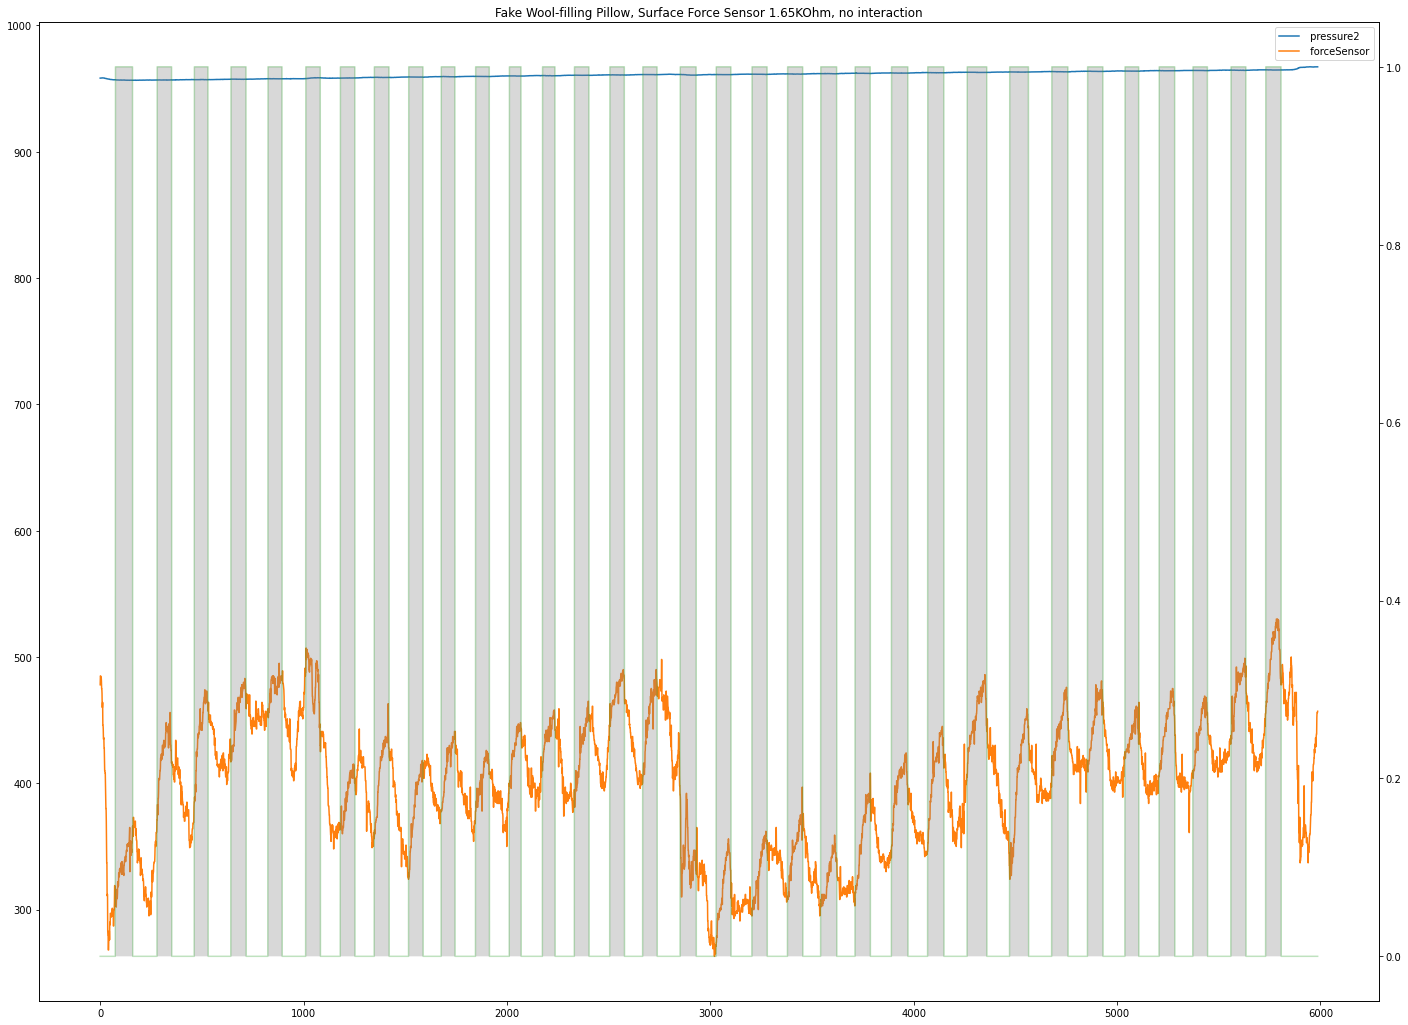

In [46]:
create_graph(file_name='force-sensor-experiments/pressure-fake-wool-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Wool-filling Pillow, Surface Force Sensor 1.65KOhm, no interaction'
             )

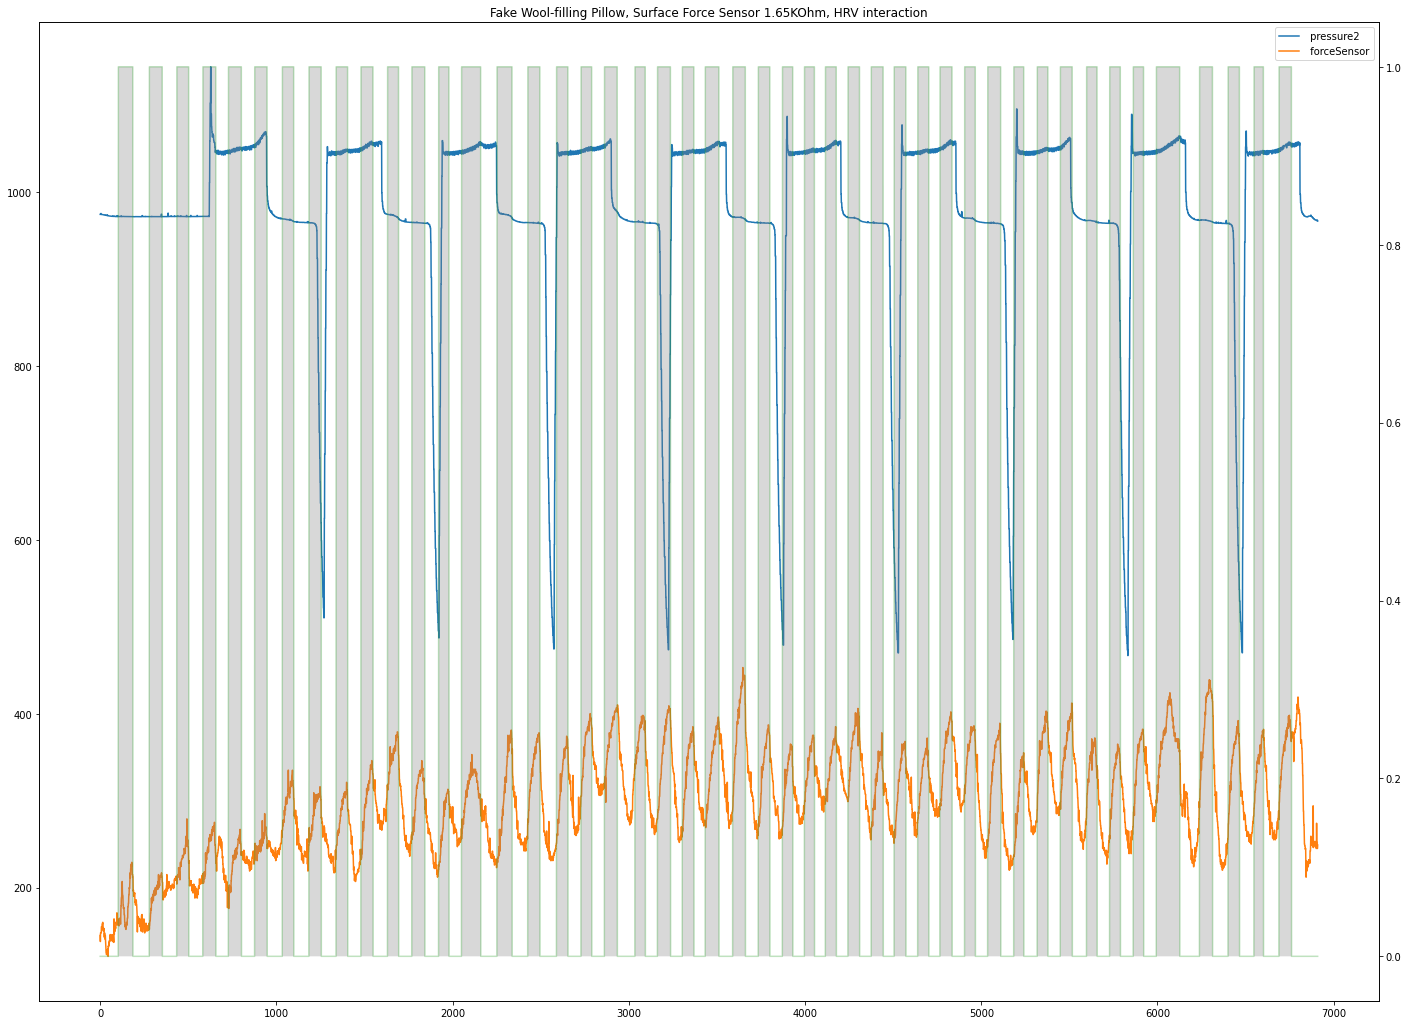

In [47]:
create_graph(file_name='force-sensor-experiments/hrvBreathing-fake-wool-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Wool-filling Pillow, Surface Force Sensor 1.65KOhm, HRV interaction'
             )

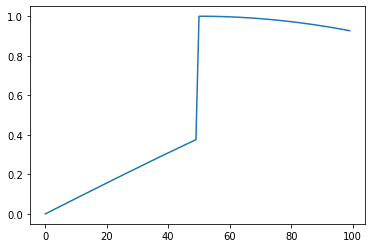

In [4]:
import numpy as np
from math import sin, cos, pi
import matplotlib.pyplot as plt

dom = np.arange(0, 1, 0.01)
def sineIn(x):
    return 1 - cos((x * pi) / 2.0)

def sineOut(x):
    return sin((x * pi) / 2.0)

def sineFull(x):
    if x < 0.5:
        return sineOut(x / 2.0);
    else:
        return 1 - sineIn((x - 0.5) / 2.0);

vf = np.vectorize(sineFull)

plt.plot(vf(dom))


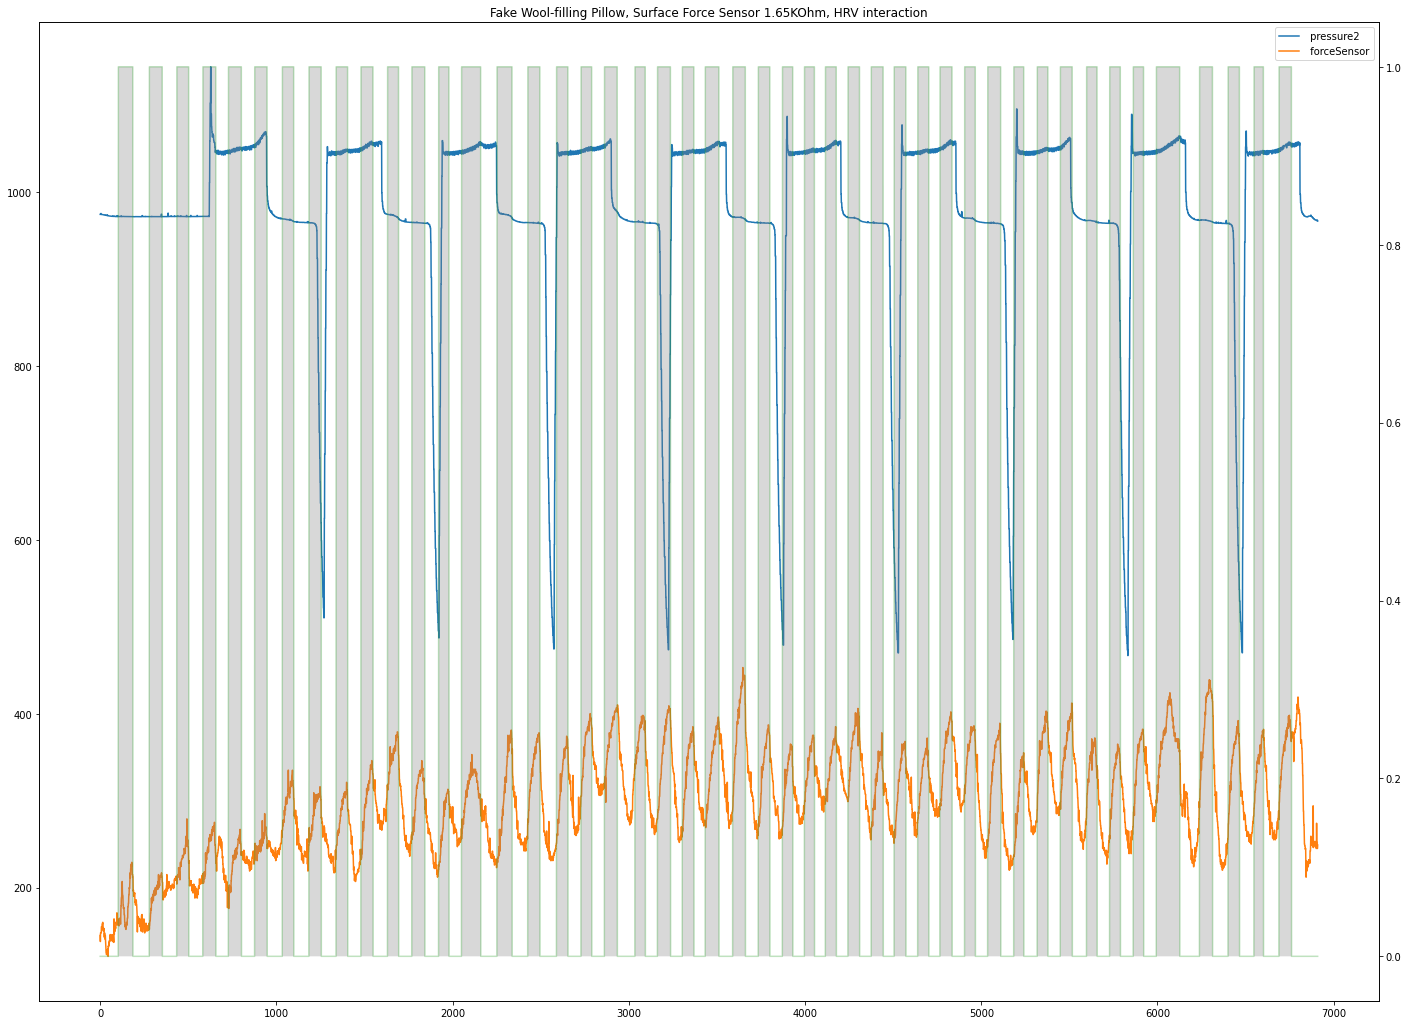

In [32]:
p_oct_6 = pd.read_csv('recording/pressure-2020-10-06T11-12-30.log')
# p_oct_6['time'] = pd.to_datetime(p_oct_6['time'])
# p_oct_6['since'] = p_oct_6['time'] - p_oct_6['time'].loc[0]
# # p_oct_6.loc[0:100].plot('time', ' pressure4', kind='scatter', figsize=(24, 18))
# p_oct_6.loc[13:75].plot(x='since', y=' pressure4', figsize=(24,18))
    
create_graph(file_name='force-sensor-experiments/hrvBreathing-fake-wool-1_65KOhm.csv',
             index_name='time',
             columns=[' pressure2', ' forceSensor'],
             secondary_column=' button',
             title='Fake Wool-filling Pillow, Surface Force Sensor 1.65KOhm, HRV interaction'
             )